 # 🔍 Overview

Random Forest is an **ensemble learning** method that builds multiple **Decision Trees** and combines their predictions to improve accuracy and robustness.

### 📌 How It Works:
- **Bagging (Bootstrap Aggregating):** Each tree is trained on a **random subset** of the data.
- **Overfitting Reduction:** By averaging multiple trees, the model generalizes better.
- **High Accuracy:** Works well on both **regression** and **classification** tasks.

## 📌 The Regression Formula:

$$
\hat{y} = \frac{1}{T} \sum_{t=1}^{T} f_t(x)
$$

### **Where:**
✔ **\( \hat{y} \) (Predicted Value)** → The estimated outcome (e.g., salary 💰)  
✔ **\( T \)** → The number of decision trees in the forest  
✔ **\( f_t(x) \)** → The prediction from an individual decision tree \( t \)  
✔ **\( \frac{1}{T} \sum_{t=1}^{T} f_t(x) \)** → The average prediction from all decision trees in the ensemble  

⚠ **\( \epsilon \) (Error Term)** → Represents the difference between actual and predicted values due to noise 🔄  

---

## 🔑 **Key Insight:**
- The **Random Forest model** is an ensemble learning method that builds multiple **Decision Trees** and averages their predictions to improve accuracy.  
- Each **tree** is trained on a random subset of the data (**bagging**), reducing overfitting.  
- **More trees → More robust model**, reducing variance and improving generalization.  
- Can **capture non-linearity** in data while being **less sensitive** to small changes.  
- Unlike **Linear Regression**, Random Forest does not require feature scaling.  

💡 **Random Forest Regression is powerful when relationships between variables are complex, and high stability & accuracy are required!** 🚀  

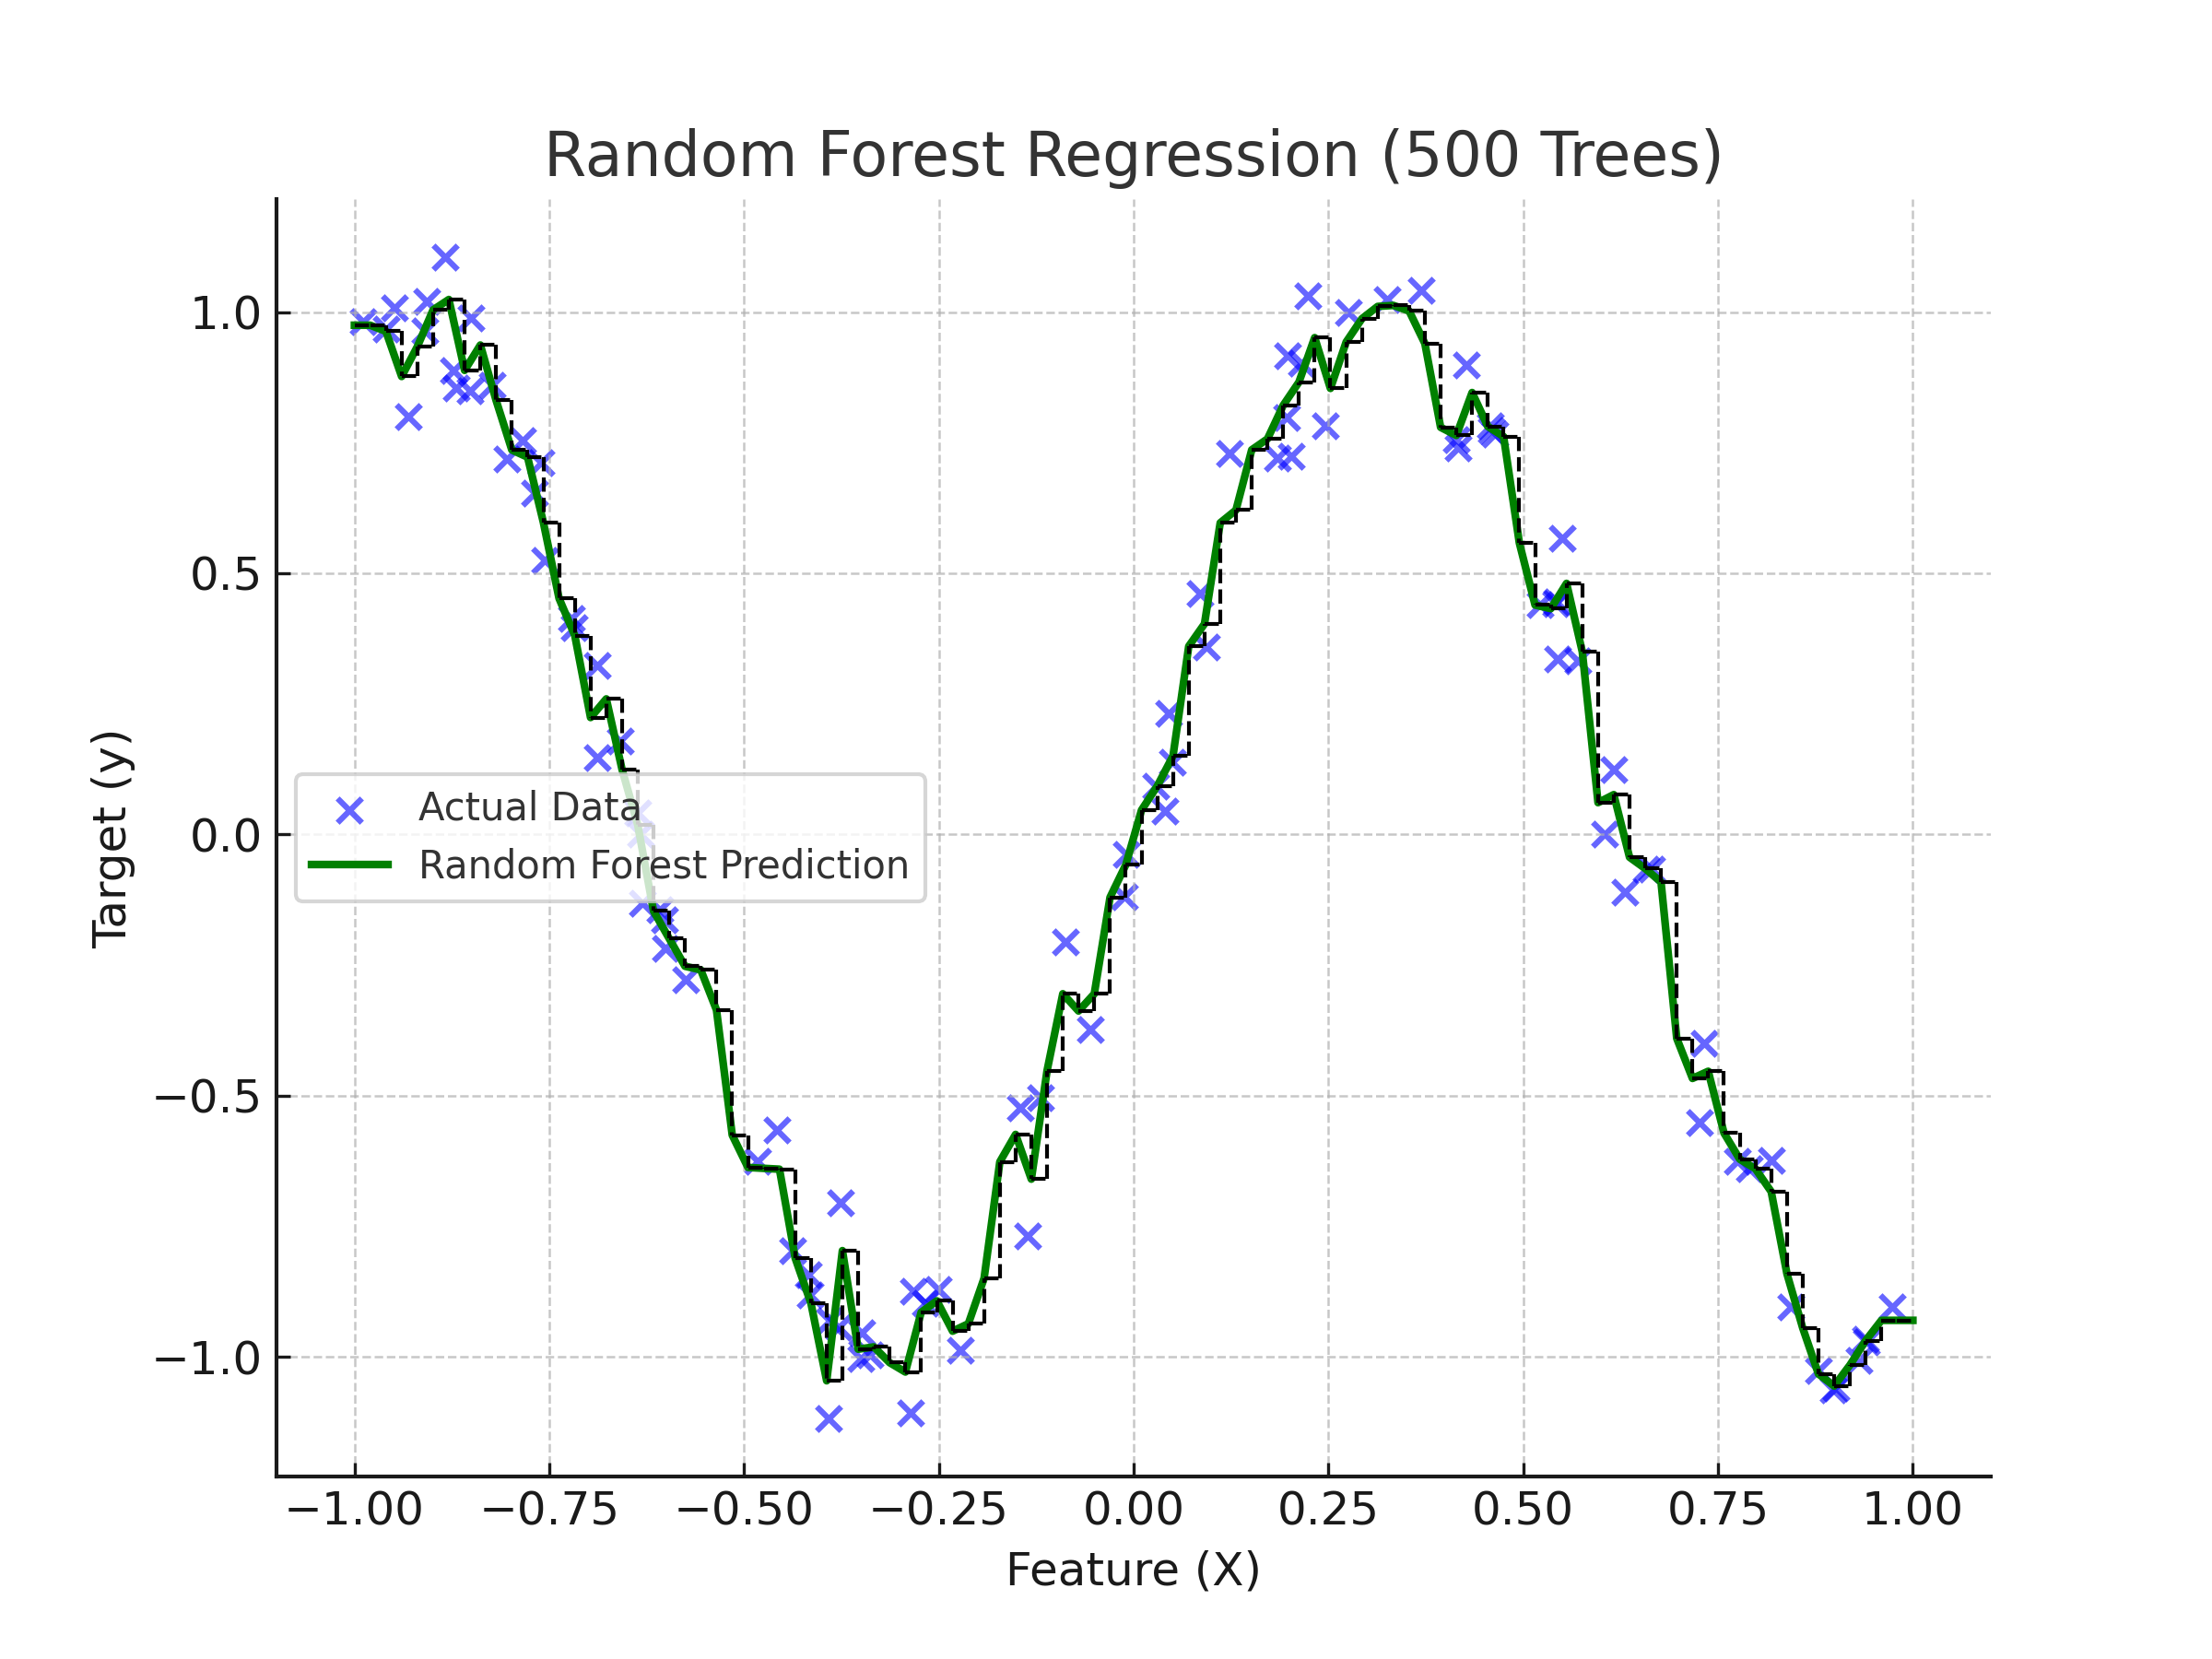

# 🔹 Step 1: Import Libraries

In [ ]:
# 📌 Import necessary libraries
import numpy as np  # 🧮 For numerical operations
import pandas as pd  # 📊 For handling tabular data
import matplotlib.pyplot as plt  # 📈 For data visualization
import seaborn as sns  # 🎨 For better visualizations

# 📌 Import machine learning models
from sklearn.ensemble import RandomForestRegressor  # 🌲 Random Forest Regressor
from sklearn.linear_model import LinearRegression  # 📏 Linear Regression
from sklearn.svm import SVR  # ⚙️ Support Vector Regression

# 📌 Import metrics for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#🔹 Step 2: Load and Prepare Data

In [ ]:
# 📌 Load the dataset
dataset_path = "housing.csv"  # 🏠 Path to dataset
dataset = pd.read_csv(dataset_path)  # 📥 Load CSV file into a Pandas DataFrame

# 📌 Select features (X) and target variable (y)
X = dataset.drop(columns=['median_house_value', 'ocean_proximity']).values  # 🎯 Features (ignore categorical column)
y = dataset['median_house_value'].values  # 💰 Target variable (house price)

# 📌 Handle missing values
imputer = SimpleImputer(strategy='median')  # 🛠️ Fill missing values with median
X = imputer.fit_transform(X)  # 🚀 Apply imputation to dataset

#🔹 Step 3: Train/Test Split

In [ ]:
# 📌 Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 🔄 80% train, 20% test


#🔹 Step 4: Initialize and Train Models

In [ ]:
# 📌 Initialize models
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # 🌲 Random Forest (100 trees)
lr_regressor = LinearRegression()  # 📏 Linear Regression
svr_regressor = SVR(kernel='rbf')  # ⚙️ Support Vector Regression (RBF kernel)

# 📌 Train models
rf_regressor.fit(X_train, y_train)  # 🌲 Train Random Forest
lr_regressor.fit(X_train, y_train)  # 📏 Train Linear Regression
svr_regressor.fit(X_train, y_train)  # ⚙️ Train Support Vector Regression


SVR()

#🔹 Step 5: Make Predictions

In [ ]:
# 📌 Make predictions
y_pred_rf = rf_regressor.predict(X_test)  # 🌲 Random Forest Predictions
y_pred_lr = lr_regressor.predict(X_test)  # 📏 Linear Regression Predictions
y_pred_svr = svr_regressor.predict(X_test)  # ⚙️ Support Vector Regression Predictions


# 🔹 Step 6: Evaluate Models

In [ ]:
# 📌 Define evaluation function
def extended_evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)  # 📏 Mean Absolute Error
    mse = mean_squared_error(y_true, y_pred)  # 🛠️ Mean Squared Error
    rmse = np.sqrt(mse)  # 📉 Root Mean Squared Error
    r2 = r2_score(y_true, y_pred)  # 📊 R-squared score
    adjusted_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1)  # 🔄 Adjusted R²
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # 🔍 Mean Absolute Percentage Error (MAPE)
    medae = np.median(np.abs(y_true - y_pred))  # 📌 Median Absolute Error

    return pd.DataFrame({
        'Model': [model_name],
        'R²': [r2],
        'Adjusted R²': [adjusted_r2],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAPE': [mape],
        'MedAE': [medae]
    })

# 📌 Compute evaluation metrics for each model
rf_eval = extended_evaluate_model(y_test, y_pred_rf, "Random Forest")
lr_eval = extended_evaluate_model(y_test, y_pred_lr, "Linear Regression")
svr_eval = extended_evaluate_model(y_test, y_pred_svr, "Support Vector Regression")

# 📌 Combine results into a single DataFrame
evaluation_results = pd.concat([rf_eval, lr_eval, svr_eval], ignore_index=True)

# 📌 Display results
display(evaluation_results)


,Model,R²,Adjusted R²,MAE,MSE,RMSE,MAPE,MedAE
0,Random Forest,0.810131,0.809762,32093.648588,2.488060e+09,49880.456462,17.908204,19114.500000
1,Linear Regression,0.613866,0.613117,51810.483628,5.059928e+09,71133.173493,30.974765,39679.263388
2,Support Vector Regression,-0.048626,-0.050662,87341.410730,1.374128e+10,117223.227101,53.083768,67393.286884


#🔹 Step 7: Visualizations

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


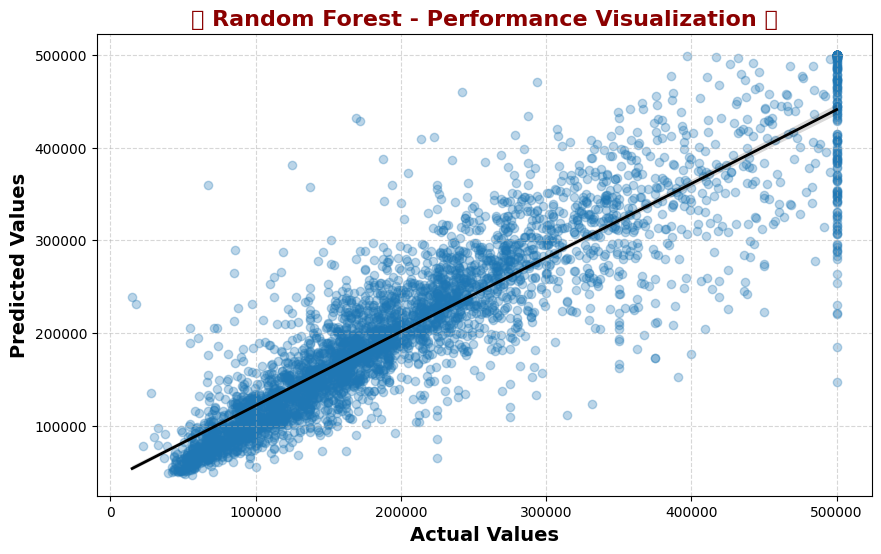

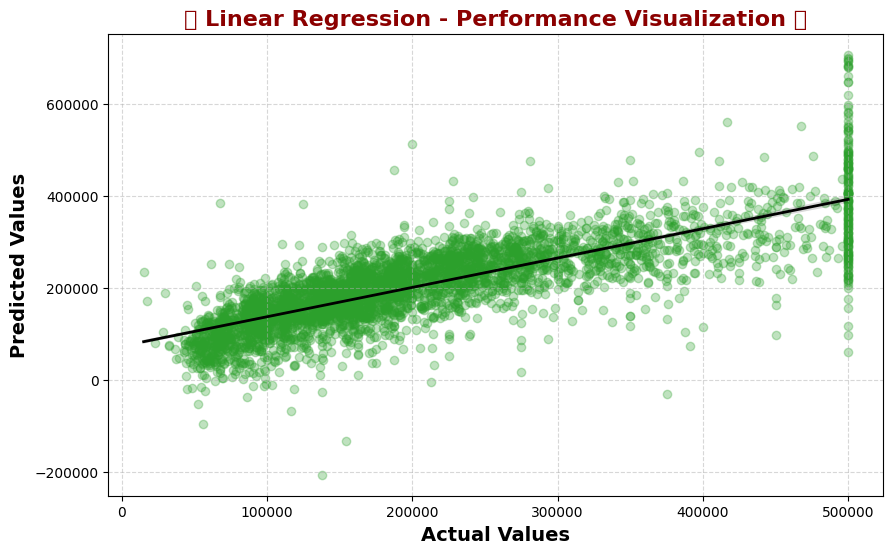

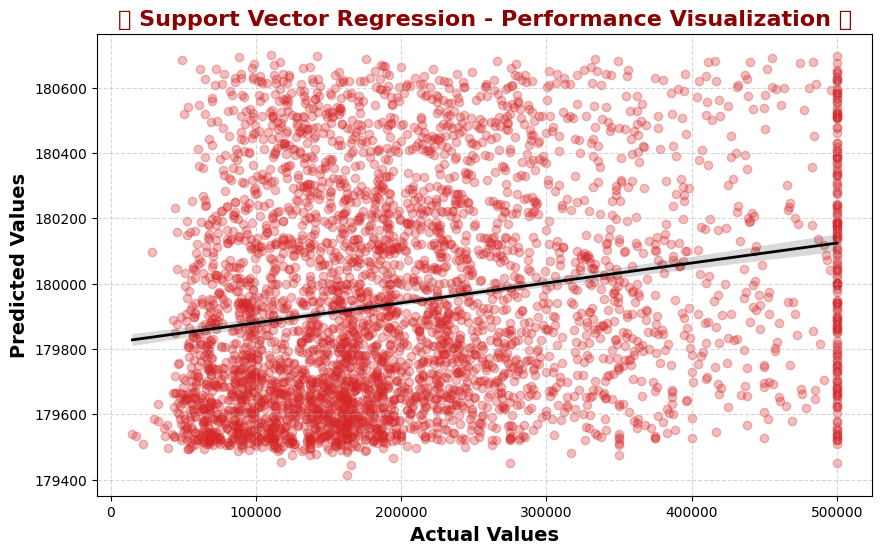

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


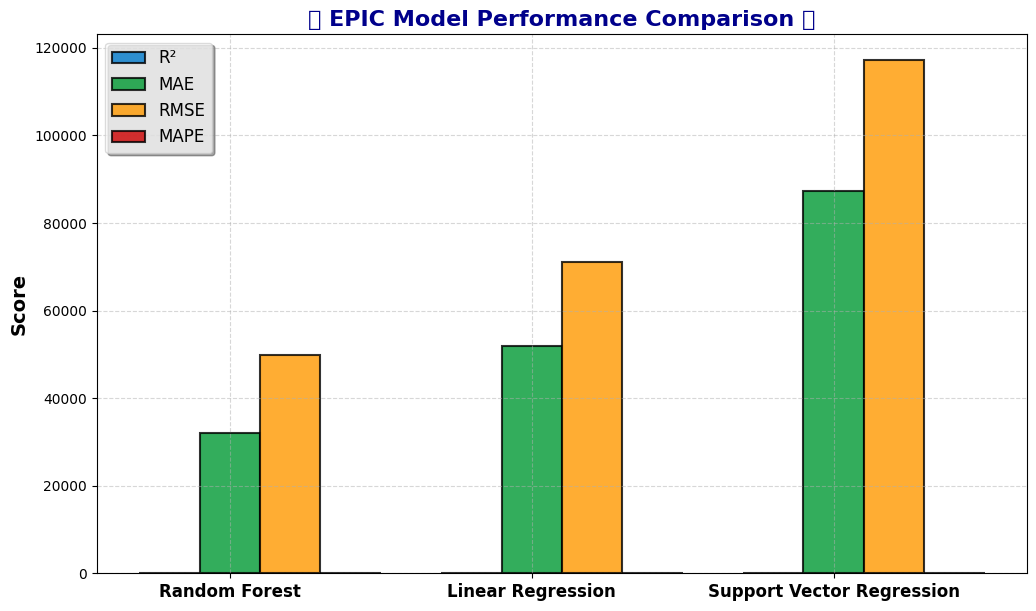

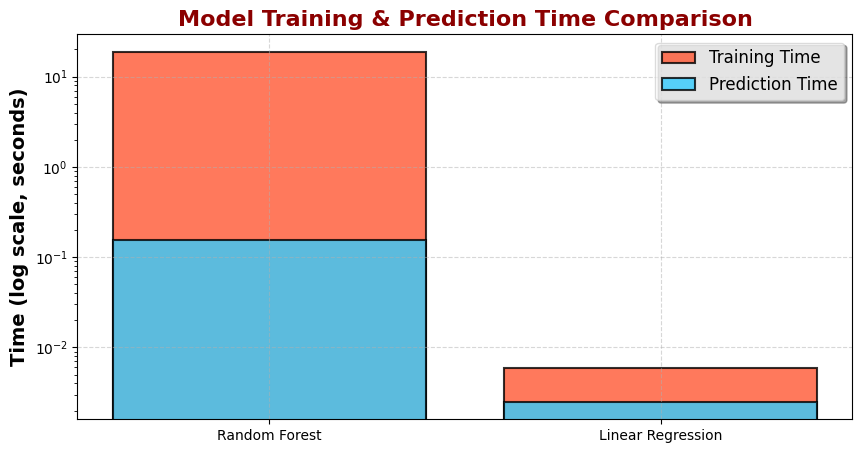

In [ ]:
# 📌 Enhanced Visualizations for Epic Effect! 🚀

# 🔥 Define new color scheme for better contrast
colors = {
    "Random Forest": "#1f77b4",  # Blue
    "Linear Regression": "#2ca02c",  # Green
    "Support Vector Regression": "#d62728"  # Red
}

# 🎨 Scatter plots with improved aesthetics
for model, y_pred in zip(models, predictions):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha": 0.3},
                line_kws={"color": "black", "linewidth": 2}, marker="o", color=colors[model])
    plt.xlabel("Actual Values", fontsize=14, fontweight="bold")
    plt.ylabel("Predicted Values", fontsize=14, fontweight="bold")
    plt.title(f"🔥 {model} - Performance Visualization 🔥", fontsize=16, fontweight="bold", color="darkred")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# 🚀 EPIC Bar Chart with Gradient Colors and Shadow Effects
plt.figure(figsize=(12, 7))
bar_width = 0.2
x = np.arange(len(models))

# 📌 Metrics for visualization with improved style
metrics = ["R²", "MAE", "RMSE", "MAPE"]
colors = ["#007acc", "#009933", "#ff9900", "#cc0000"]  # Enhanced color scheme

for i, metric in enumerate(metrics):
    values = evaluation_results[metric].values
    plt.bar(x + i * bar_width, values, bar_width, label=metric, color=colors[i], alpha=0.8, edgecolor="black", linewidth=1.5)

plt.xticks(x + bar_width, models, fontsize=12, fontweight="bold")
plt.ylabel("Score", fontsize=14, fontweight="bold")
plt.title("🚀 EPIC Model Performance Comparison 🚀", fontsize=16, fontweight="bold", color="darkblue")
plt.legend(fontsize=12, loc="best", shadow=True, fancybox=True, framealpha=0.7)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ⏳ Time Complexity Graph with 3D Effect
fig, ax = plt.subplots(figsize=(10, 5))

# 📌 Bar chart with proper scaling
ax.bar(train_times.keys(), train_times.values(), color="#ff5733", label="Training Time", alpha=0.8, edgecolor="black", linewidth=1.5)
ax.bar(predict_times.keys(), predict_times.values(), color="#33ccff", label="Prediction Time", alpha=0.8, edgecolor="black", linewidth=1.5)

# 📌 Adjusting log scale for better visualization
ax.set_yscale("log")  # ⚡ Log scale helps when values differ a lot

ax.set_ylabel("Time (log scale, seconds)", fontsize=14, fontweight="bold")
ax.set_title("Model Training & Prediction Time Comparison", fontsize=16, fontweight="bold", color="darkred")
ax.legend(fontsize=12, loc="best", shadow=True, fancybox=True, framealpha=0.7)
ax.grid(True, linestyle="--", alpha=0.5)

plt.show()

# 🚀 EPIC Model Performance Heatmap

<ipython-input-42-8c1e30122eeb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="coolwarm", edgecolor="black", linewidth=2)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


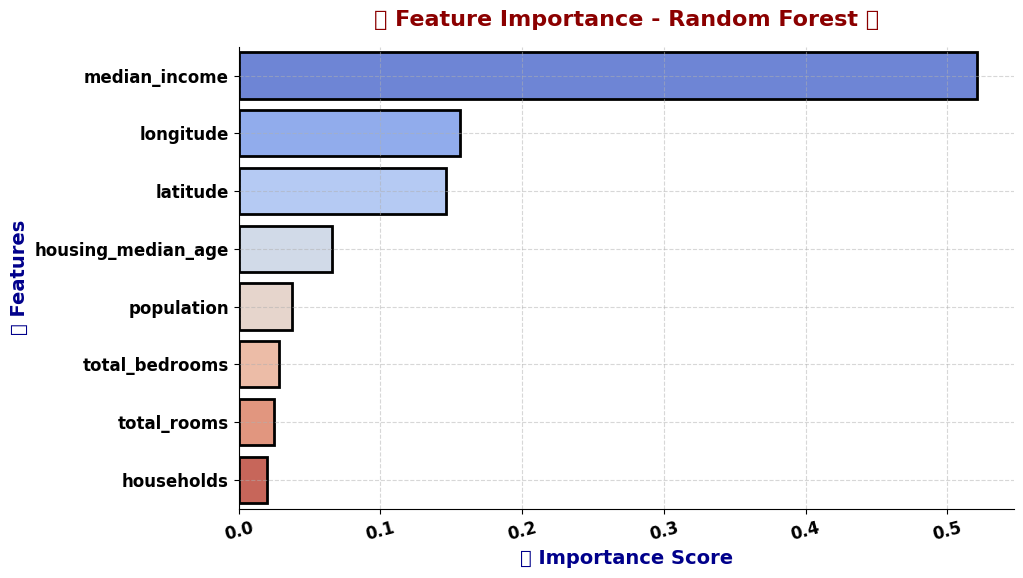

In [ ]:
# 🎯 Extract feature importance from Random Forest
feature_importance = rf_regressor.feature_importances_  # Get feature importance values
feature_names = dataset.drop(columns=['median_house_value', 'ocean_proximity']).columns  # Get feature names

# 📊 Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)  # Sort by importance

# 🎨 Improved Visualization with Bold Styling
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="coolwarm", edgecolor="black", linewidth=2)

# 🖌️ Formatting with Clean & Epic Look
plt.title("🔥 Feature Importance - Random Forest 🔥", fontsize=16, fontweight="bold", color="darkred", pad=15)
plt.xlabel("🔹 Importance Score", fontsize=14, fontweight="bold", color="darkblue")
plt.ylabel("📌 Features", fontsize=14, fontweight="bold", color="darkblue")
plt.xticks(fontsize=12, fontweight="bold", rotation=15)
plt.yticks(fontsize=12, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.5)

# 🚀 Keeping only essential visual elements
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()